<a href="https://colab.research.google.com/github/natalia2000-jpg/Machine-learning/blob/main/%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Εργασία 9 – Βαθιά Ενισχυτική Μάθηση


Όνομα:Ναταλία Ταμβακίδου ΑΕΜ:200

#Βήμα 1

In [1]:
!pip install swig

In [2]:
pip install gymnasium[box2d]

In [3]:
!pip install renderlab

In [4]:
!pip install "ray[rllib]"

#Βήμα 2

Οι τρεις συναρτήσεις συναρτήσεις: step, reset, render συμβάλουν στην αλληλεπίδραση ανάμεσα στον agent και στο enviroment.Χωρίς αυτές ο agent δεν μπορεί ούτε να δει,ούτε να δράση.


1. **reset**

Η συνάρτηση αυτή ορίζει το σημείο εκκίνησης.Πρέπει να καλείται πάντα στην αρχή ενός νέου episode.
*  Αυτό που κάνει είνα να επαναφέρει το περιβάλλον στην αρχική του κατάσταση.
* Επιστρέφει κάθε φορά την πρώτη παρατήρηση(πχ τις συντεταγμένες του πράκτορα)

2.   **step**

Είναι η πιο σημαντική συνάρτηση, καθώς "προχωράει" το χρόνο στο περιβάλλον κατά ένα βήμα (timestep).

*   Δέχεται ένα action απο τον agent,το εφαρμόζει στους νόμους της φυσικής του παιχνιδιού και υπολογίζει τι συνέβει.
*   Στην συνέχεια επιστρέφει 5 τιμές:

    1.Την νέα κατάσταση μετά την ενέργεια

    2.Το reward που έλαβε ο agent
    
    3.True/False αν ο agent πέτυχε τον στόχο ή αν συνετρίβη

    4.True/False αν το επεισόδιο έληξε για εξωτερικούς λόγους(πχ έληξε ο χρόνος)

    5.Επιπλέον διαγνωστικά δεδομένα

3. **render**

Αυτή η συνάρτηση ασχολείται αποκλειστικά με την οπτικοποιήση.Στην ουσία δημιουργεί μια οπτική αναπαράσταση της τρέχουσας κατάστασης






#Βήμα 3

Η έκδοση LunarLander-v3 είναι η πιο πρόσφατη αναβάθμιση του κλασικού περιβάλλοντος στο Gymnasium.Η αναλυτική περιγραφή των τριών βασικών πυλώνων του περιβάλλοντος:

1. **Observation Space** (Χώρος Παρατηρήσεων)

Ο πράκτορας λαμβάνει πληροφορίες για την κατάσταση του διαστημοπλοίου μέσω ενός διανύσματος 8 τιμών (τύπου Box). Αυτές οι τιμές επιτρέπουν στον πράκτορα να καταλαβαίνει τη θέση και την κίνηση του σκάφους:

1.**Οριζόντια Θέση (x):** Η απόσταση από το κέντρο της πίστας (το σημείο προσγείωσης είναι στο 0).

2.**Κατακόρυφη Θέση (y):** Το ύψος από το έδαφος.

3.**Οριζόντια Ταχύτητα (vx):** Πόσο γρήγορα κινείται δεξιά ή αριστερά.

4.**Κατακόρυφη Ταχύτητα (vy):** Πόσο γρήγορα πέφτει ή ανεβαίνει.

5.**Γωνία (Angle):** Η κλίση του σκάφους σε ακτίνια (0 είναι η όρθια θέση).

6.**Γωνιακή Ταχύτητα:** Πόσο γρήγορα περιστρέφεται το σκάφος.

7.**Επαφή αριστερού ποδιού:** Δυαδική τιμή (0 ή 1) - αν το αριστερό πόδι ακουμπάει στο έδαφος.

8.**Επαφή δεξιού ποδιού:** Δυαδική τιμή (0 ή 1) - αν το δεξί πόδι ακουμπάει στο έδαφος.

2. **Action Space** (Χώρος Ενεργειών)

Στην τυπική του μορφή, το περιβάλλον διαθέτει έναν Discrete(4) χώρο ενεργειών. Αυτό σημαίνει ότι ο πράκτορας μπορεί να επιλέξει μία από τις εξής 4 διακριτές ενέργειες σε κάθε βήμα:

* **0**: Καμία ενέργεια (Free fall).
* **1**: Πυροδότηση αριστερού βοηθητικού κινητήρα (για στροφή προς τα δεξιά).

* **2**: Πυροδότηση κύριου κινητήρα (για ώθηση προς τα πάνω).

* **3**: Πυροδότηση δεξιού βοηθητικού κινητήρα (για στροφή προς τα αριστερά).

3. **Reward Function** (Συνάρτηση Επιβράβευσης)

Το σύστημα ανταμοιβών είναι σχεδιασμένο για να καθοδηγεί τον πράκτορα προς μια ασφαλή και αποδοτική προσγείωση. Οι πόντοι υπολογίζονται ως εξής:

* **Προσέγγιση & Ταχύτητα**: Ο πράκτορας κερδίζει πόντους όσο πλησιάζει στο σημείο προσγείωσης με χαμηλή ταχύτητα. Η συνολική ανταμοιβή για τη μετακίνηση από την κορυφή έως το σημείο προσγείωσης είναι 100-140 πόντοι.

* **Επαφή με το έδαφος**: Κάθε πόδι που ακουμπάει στο έδαφος δίνει +10 πόντους.

* **Καύσιμα (Ποινή)**:

  α. Η χρήση του κύριου κινητήρα κοστίζει -0.3 πόντους ανά frame.

  β. Η χρήση των πλευρικών κινητήρων κοστίζει -0.03 πόντους ανά frame.

  **Στόχος**: Ο πράκτορας πρέπει να μάθει να προσγειώνεται ξοδεύοντας όσο το δυνατόν λιγότερη ενέργεια.

* **Τερματισμός**:

  * **Συντριβή (Crash)**: Τιμωρία -100 πόντοι.

  * **Ασφαλής Προσγείωση (Rest)**: Επιβράβευση +100 πόντοι.

**Σημείωση**: Ένα επεισόδιο θεωρείται "λυμένο" (solved) αν ο πράκτορας καταφέρει να συγκεντρώσει κατά μέσο όρο 200 πόντους.

#Βήμα 4

In [5]:
import gymnasium as gym
import renderlab as rl

# 1. Δημιουργία του περιβάλλοντος
env = gym.make("LunarLander-v3", render_mode="rgb_array")

# 2. Ενσωμάτωση του RenderLab
env = rl.RenderFrame(env, "./output")

# 3. Επαναφορά του περιβάλλοντος
observation, info = env.reset(seed=42)

# Δημιουργούμε μια μεταβλητή για να αθροίζουμε τις ανταμοιβές
total_reward = 0

print("Ξεκινάμε την προσομοίωση του Random Agent...")

# 4. Επανάληψη βημάτων
for step in range(500):
    # Ο random agent επιλέγει μια τυχαία ενέργεια
    action = env.action_space.sample()

    # Εκτελούμε την ενέργεια
    observation, reward, terminated, truncated, info = env.step(action)

    # Προσθέτουμε την ανταμοιβή του βήματος στο σύνολο
    total_reward += reward

    # Ελέγχουμε αν το επεισόδιο έχει τελειώσει
    if terminated or truncated:
        print(f"Επεισόδιο ολοκληρώθηκε στο βήμα {step+1}. Συνολική ανταμοιβή: {total_reward:.2f}")
        break

# 5. Οπτικοποίηση
print("\nΔημιουργία βίντεο...")
env.play()

Ξεκινάμε την προσομοίωση του Random Agent...
Επεισόδιο ολοκληρώθηκε στο βήμα 108. Συνολική ανταμοιβή: -126.86

Δημιουργία βίντεο...
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


#Βήμα 5

In [6]:

import numpy as np

# Δημιουργία περιβάλλοντος
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output")

all_scores = [] # Λίστα για την αποθήκευση των σκορ
num_episodes = 5

print(f"Ξεκινάμε την προσομοίωση για {num_episodes} επεισόδια...")

for episode in range(num_episodes):
    observation, info = env.reset()
    episode_reward = 0
    terminated = False
    truncated = False

    while not (terminated or truncated):
        # Τυχαία επιλογή ενέργειας
        action = env.action_space.sample()

        # Εκτέλεση ενέργειας
        observation, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward

    all_scores.append(episode_reward)
    print(f"Επεισόδιο {episode + 1}: Score = {episode_reward:.2f}")

# Υπολογισμός μέσου όρου
average_score = np.mean(all_scores)

print("-" * 30)
print(f"Μέσο Score μετά από {num_episodes} επεισόδια: {average_score:.2f}")
print("-" * 30)

# Οπτικοποίηση του τελευταίου επεισοδίου
print("\nΕμφάνιση video (τελευταίο επεισόδιο):")
env.play()

Ξεκινάμε την προσομοίωση για 5 επεισόδια...
Επεισόδιο 1: Score = -262.40
Επεισόδιο 2: Score = -314.83
Επεισόδιο 3: Score = -41.02
Επεισόδιο 4: Score = -114.48
Επεισόδιο 5: Score = -113.30
------------------------------
Μέσο Score μετά από 5 επεισόδια: -169.20
------------------------------

Εμφάνιση video (τελευταίο επεισόδιο):
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


#Βήμα 6

In [7]:
!pip install stable-baselines3[extra]

In [8]:
#Εκπαίδευση με τον αλγόριθμο DQN
from stable_baselines3 import DQN

# Δημιουργία περιβάλλοντος
env = gym.make("LunarLander-v3")

# Ορισμός του μοντέλου
model_dqn = DQN("MlpPolicy", env, verbose=1)

# Εκπαίδευση για 100,000 βήματα
print("Έναρξη εκπαίδευσης DQN...")
model_dqn.learn(total_timesteps=100000)

# Αποθήκευση του μοντέλου
model_dqn.save("dqn_lunar_lander")

  return datetime.utcnow().replace(tzinfo=utc)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


  return datetime.utcnow().replace(tzinfo=utc)



Έναρξη εκπαίδευσης DQN...
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.5     |
|    ep_rew_mean      | -141     |
|    exploration_rate | 0.963    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1405     |
|    time_elapsed     | 0        |
|    total_timesteps  | 394      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.52     |
|    n_updates        | 73       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.1     |
|    ep_rew_mean      | -180     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 1034     |
|    time_elapsed     | 0        |
|    total_timesteps  | 761      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.78 

In [9]:
#Εκπαίδευση με τον αλγόριθμο PPO
from stable_baselines3 import PPO


# Δημιουργία περιβάλλοντος
env = gym.make("LunarLander-v3")

# Ορισμός του μοντέλου (MlpPolicy = Neural Network για απλά διανύσματα παρατηρήσεων)
model_ppo = PPO("MlpPolicy", env, verbose=1)

# Εκπαίδευση για 100,000 βήματα (ένας καλός αριθμός για να δούμε αποτελέσματα)
print("Έναρξη εκπαίδευσης PPO...")
model_ppo.learn(total_timesteps=100000)

# Αποθήκευση του μοντέλου
model_ppo.save("ppo_lunar_lander")

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Έναρξη εκπαίδευσης PPO...
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 99.5     |
|    ep_rew_mean     | -236     |
| time/              |          |
|    fps             | 1039     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 98.2         |
|    ep_rew_mean          | -203         |
| time/                   |              |
|    fps                  | 388          |
|    iterations           | 2            |
|    time_elapsed         | 10           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0055678054 |
|    clip_fraction        | 0.0155       |
|    clip_range         

In [10]:
# Φόρτωση του εκπαιδευμένου μοντέλου
model = PPO.load("ppo_lunar_lander")

# Δημιουργία περιβάλλοντος οπτικοποίησης
env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output_ppo")

obs, info = env.reset()
for _ in range(1000): # Αυξάνουμε τον αριθμό των βημάτων για μεγαλύτερη διάρκεια βίντεο
    # Πρόβλεψη της καλύτερης κίνησης αντί για τυχαία επιλογή
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        break

env.play()

Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  97%|█████████▋| 975/1002 [00:04<00:00, 239.17it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output_ppo/1768413030.0563753.mp4, 720000 bytes wanted but 0 bytes read,at frame 1001/1002, at time 33.37/33.37 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [11]:
def evaluate_model(model, env_name, num_episodes=5):
    temp_env = gym.make(env_name)
    episode_rewards = []
    for _ in range(num_episodes):
        obs, info = temp_env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = temp_env.step(action)
            total_reward += reward
            done = terminated or truncated
        episode_rewards.append(total_reward)
    return np.mean(episode_rewards)

# Υπολογισμός
mean_ppo = evaluate_model(model_ppo, "LunarLander-v3")
mean_dqn = evaluate_model(model_dqn, "LunarLander-v3")

print(f"Mean Reward PPO: {mean_ppo:.2f}")
print(f"Mean Reward DQN: {mean_dqn:.2f}")

Mean Reward PPO: -234.88
Mean Reward DQN: 79.70


#Βήμα 6

In [12]:
from stable_baselines3 import DQN

# Δημιουργία περιβάλλοντος
env = gym.make("LunarLander-v3")

# Ορισμός μοντέλου DQN
model_dqn = DQN(
    "MlpPolicy",
    env,
    verbose=1
)

# Εκπαίδευση για 100.000 βήματα
model_dqn.learn(total_timesteps=100000)

# Αποθήκευση μοντέλου
model_dqn.save("dqn_lunar_lander")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 79       |
|    ep_rew_mean      | -131     |
|    exploration_rate | 0.97     |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1115     |
|    time_elapsed     | 0        |
|    total_timesteps  | 316      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.37     |
|    n_updates        | 53       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.2     |
|    ep_rew_mean      | -183     |
|    exploration_rate | 0.933    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 883      |
|    time_elapsed     | 0        |
|    total_timesteps  | 706      |
| train/              |        

In [13]:
# Δημιουργία περιβάλλοντος
env = gym.make("LunarLander-v3")

# Ορισμός μοντέλου PPO
model_ppo = PPO(
    "MlpPolicy",
    env,
    verbose=1
)

# Εκπαίδευση για 100.000 βήματα
model_ppo.learn(total_timesteps=100000)

# Αποθήκευση μοντέλου
model_ppo.save("ppo_lunar_lander")


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91.1     |
|    ep_rew_mean     | -168     |
| time/              |          |
|    fps             | 1232     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 99.7        |
|    ep_rew_mean          | -175        |
| time/                   |             |
|    fps                  | 916         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.011016419 |
|    clip_fraction        | 0.0657      |
|    clip_range           | 0.2         |
|    entropy_loss   

#Ερωτημα 7

In [14]:
mean_reward_ppo = evaluate_model(model_ppo, "LunarLander-v3")
mean_reward_dqn = evaluate_model(model_dqn, "LunarLander-v3")

print(f"Μέσο Reward PPO (5 επεισόδια): {mean_reward_ppo:.2f}")
print(f"Μέσο Reward DQN (5 επεισόδια): {mean_reward_dqn:.2f}")


Μέσο Reward PPO (5 επεισόδια): -51.79
Μέσο Reward DQN (5 επεισόδια): -42.89


In [16]:
import time
from stable_baselines3.common.monitor import Monitor

env_id = "LunarLander-v3"
total_timesteps = 100000

# PPO
env_ppo = Monitor(gym.make(env_id))
start_time = time.time()
model_ppo = PPO("MlpPolicy", env_ppo, verbose=0)
model_ppo.learn(total_timesteps=total_timesteps)
ppo_time = time.time() - start_time

# DQN
env_dqn = Monitor(gym.make(env_id))
start_time = time.time()
model_dqn = DQN("MlpPolicy", env_dqn, verbose=0)
model_dqn.learn(total_timesteps=total_timesteps)
dqn_time = time.time() - start_time

  return datetime.utcnow().replace(tzinfo=utc)



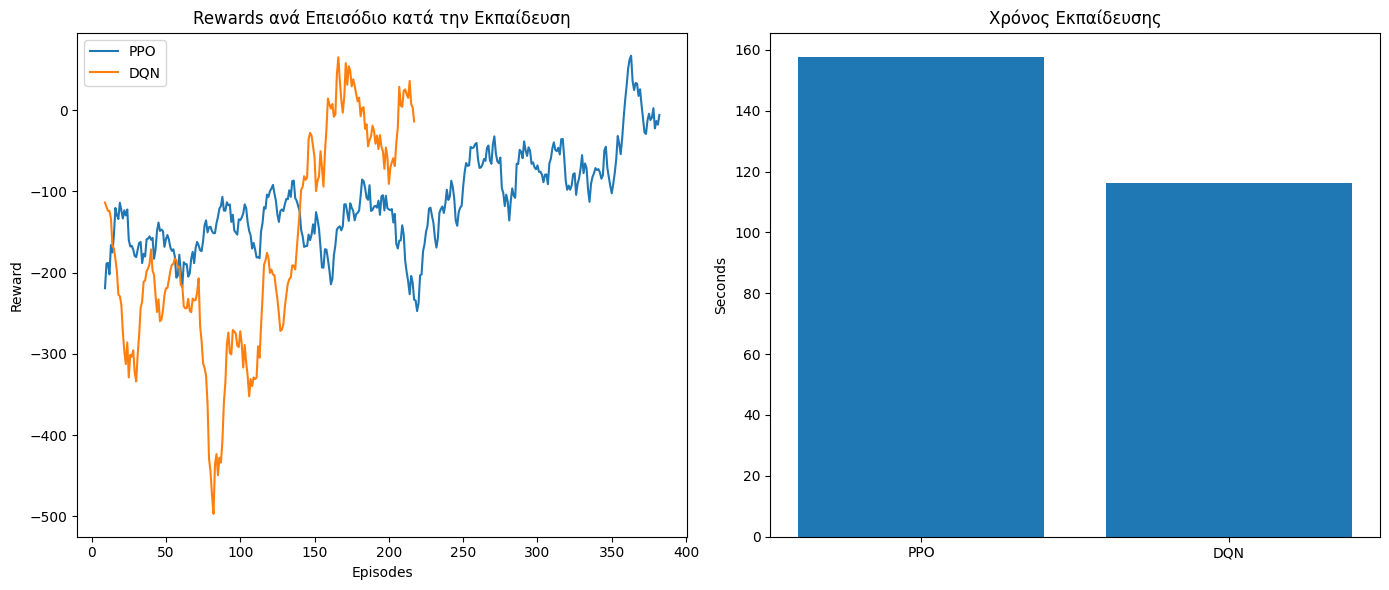

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

def moving_average(data, window=10):
    return pd.Series(data).rolling(window).mean()

ppo_rewards = env_ppo.get_episode_rewards()
dqn_rewards = env_dqn.get_episode_rewards()

plt.figure(figsize=(14, 6))

# Γράφημα Rewards
plt.subplot(1, 2, 1)
plt.plot(moving_average(ppo_rewards), label="PPO")
plt.plot(moving_average(dqn_rewards), label="DQN")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Rewards ανά Επεισόδιο κατά την Εκπαίδευση")
plt.legend()

# Γράφημα Χρόνου Εκπαίδευσης
plt.subplot(1, 2, 2)
plt.bar(["PPO", "DQN"], [ppo_time, dqn_time])
plt.ylabel("Seconds")
plt.title("Χρόνος Εκπαίδευσης")

plt.tight_layout()
plt.show()


#Βήμα 8

In [23]:

env_id = "LunarLander-v3"
total_timesteps = 200_000

# PPO params (example, adjust as needed)
ppo_params = {
    "learning_rate": 0.0003,
    "n_steps": 2048,
    "batch_size": 64,
    "n_epochs": 10,
    "gamma": 0.99,
    "gae_lambda": 0.95,
    "clip_range": 0.2,
    "ent_coef": 0.01,
    "verbose": 1
}

# DQN params (example, adjust as needed)
dqn_params = {
    "learning_rate": 0.0001,
    "buffer_size": 100000,
    "learning_starts": 1000,
    "batch_size": 32,
    "gamma": 0.99,
    "train_freq": 4,
    "gradient_steps": 1,
    "target_update_interval": 1000,
    "exploration_fraction": 0.1,
    "exploration_final_eps": 0.05,
    "verbose": 1
}


# --- PPO ---
env_ppo = Monitor(gym.make(env_id))
start = time.time()
model_ppo = PPO("MlpPolicy", env_ppo, **ppo_params)
model_ppo.learn(total_timesteps=total_timesteps)
ppo_time = time.time() - start

# --- DQN ---
env_dqn = Monitor(gym.make(env_id))
start = time.time()
model_dqn = DQN("MlpPolicy", env_dqn, **dqn_params)
model_dqn.learn(total_timesteps=total_timesteps)
dqn_time = time.time() - start

Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 88.8     |
|    ep_rew_mean     | -171     |
| time/              |          |
|    fps             | 1140     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 90.1        |
|    ep_rew_mean          | -151        |
| time/                   |             |
|    fps                  | 835         |
|    iterations           | 2           |
|    time_elapsed         | 4           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005197934 |
|    clip_fraction        | 0.00283     |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.38       |
|    explained_varia

In [24]:
def evaluate_model(model, env_name, num_episodes=5):
    temp_env = gym.make(env_name)
    episode_rewards = []
    for _ in range(num_episodes):
        obs, info = temp_env.reset()
        done = False
        total_reward = 0
        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = temp_env.step(action)
            total_reward += reward
            done = terminated or truncated
        episode_rewards.append(total_reward)
    return np.mean(episode_rewards)

mean_ppo = evaluate_model(model_ppo, env_id)
mean_dqn = evaluate_model(model_dqn, env_id)

print(f"PPO Mean Reward: {mean_ppo:.2f}")
print(f"DQN Mean Reward: {mean_dqn:.2f}")

PPO Mean Reward: 176.10
DQN Mean Reward: -51.18


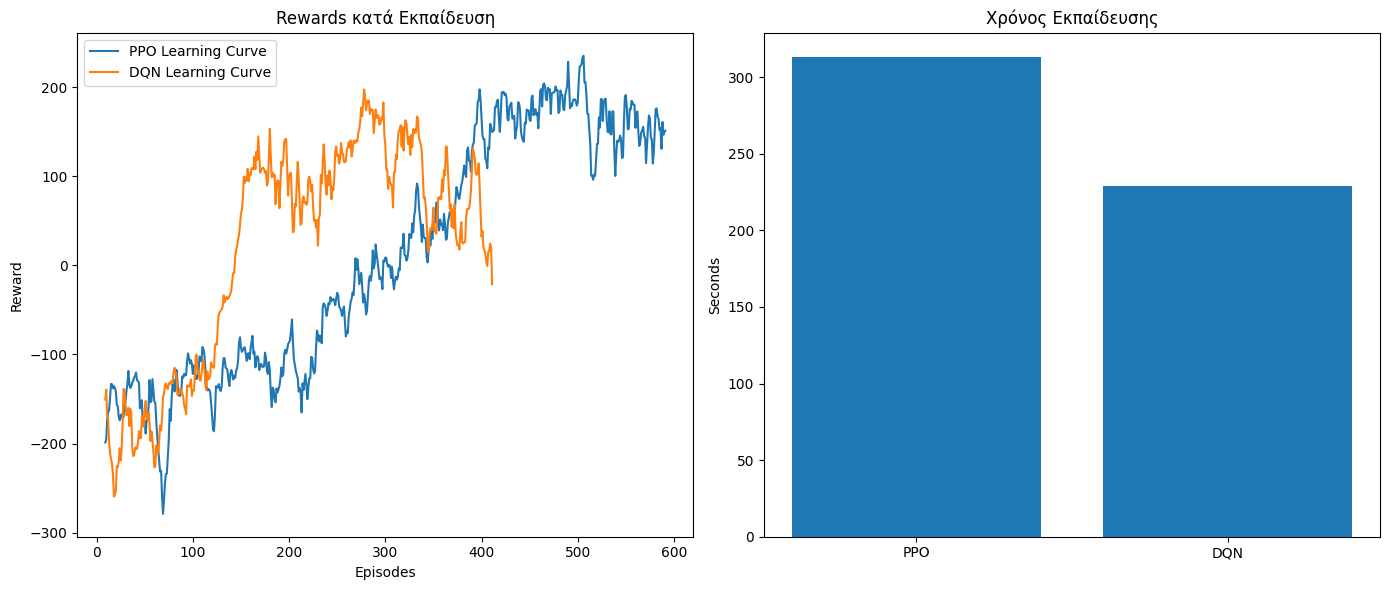

In [25]:
# rewards list από Monitor
ppo_rewards = env_ppo.get_episode_rewards()
dqn_rewards = env_dqn.get_episode_rewards()

def moving_avg(x, w=10): return pd.Series(x).rolling(w).mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(moving_avg(ppo_rewards), label="PPO Learning Curve")
plt.plot(moving_avg(dqn_rewards), label="DQN Learning Curve")
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.title("Rewards κατά Εκπαίδευση")
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(["PPO", "DQN"], [ppo_time, dqn_time])
plt.title("Χρόνος Εκπαίδευσης")
plt.ylabel("Seconds")

plt.tight_layout()
plt.show()
